In [1]:
import math
import matplotlib.pyplot as plt

class Gaussian():
  """ 
      Gaussian Distribution Class for visualizing and calculating
      a Gaussian distribution. 

      Attributes:
      mean (float)
      stDev (float)
      data_list (lits of floats)

  """
  def __init__(self, mu = 0, sigma = 0):

    self.mean = mu
    self.stDev = sigma
    self.data = []
  
  def calculate_mean(self):

    avg = 1.0 * sum(self.data) / len(self.data)
    self.mean = avg
    # print(self.mean)
    return self.mean

  def calculate_stdDev(self, sample = True):

    if sample:
      n = len(self.data) - 1
    else: 
      n = len(self.data)
    mean = self.mean
    sigma = 0
    for d in self.data:
      sigma += (d - mean)**2
    sigma = math.sqrt(sigma/n)
    self.stDev = sigma
    # print(self.stDev)
    return self.stDev

  def read_data_file(self, file_name, sample=True):

    with open(file_name) as file:
      data_list = []
      line = file.readline()
      while line:
        data_list.append(int(line))
        line = file.readline()
    file.close()

    self.data = data_list
    self.mean = self.calculate_mean()
    self.stDev = self.calculate_stdDev(sample)
  
  def plot_histogram(self):

    plt.hist(self.data)
    plt.title('Histogram of Data')
    plt.xlabel('data')
    plt.ylabel('count')
  
  def probability_density_function(self, x):

    return (1.0 / (self.stDev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x-self.mean) / self.stDev)**2)

  def plot_histogram_pdf(self, n_spaces = 50):

    """
    plotting normalized histogram of probability density function

    """
    mu = self.mean
    sigma = self.stDev

    min_range = min(self.data)
    max_range = max(self.data)

    # calculating intervals between x values
    interval = 1.0 * (max_range - min_range) / n_spaces
    x = []; y = []

    for i in range(n_spaces):
      tmp = min_range + interval*i
      x.append(tmp)
      y.append(self.probability_density_function(tmp))
    
    fig, axes = plt.subplots(2, sharex= True)
    fig.subplots_adjust(hspace = 0.5)
    
    axes[0].hist(self.data, density = True)
    axes[0].set_title('Normed Histogram of Data')
    axes[0].set_ylabel('Density')
    axes[1].plot(x, y)
    axes[1].set_title('Normal Distribtion for \n Sample Mean and Sample Standard Deviation')
    axes[0].set_ylabel('Density')
    plt.show()

    return x, y
  
  def __add__(self, other):
          
          """Function to add together two Gaussian distributions
          
          Args:
              other (Gaussian): Gaussian instance
              
          Returns:
              Gaussian: Gaussian distribution
              
          """
          
          result = Gaussian()
          result.mean = self.mean + other.mean
          result.stDev = math.sqrt(self.stDev ** 2 + other.stDev ** 2)
          return result
        
        
  def __repr__(self):
    
        """Function to output the characteristics of the Gaussian instance
        
        Args:
            None
        
        Returns:
            string: characteristics of the Gaussian
        
        """ 
        return "mean {}, standard deviation {}".format(self.mean, self.stDev)

In [2]:
gaussian_o = Gaussian()

In [4]:
gaussian_o.read_data_file('Numbers.txt')

In [5]:
print(gaussian_o.mean)

78.0909090909091


In [6]:
print(gaussian_o.stDev)

92.87459776004906


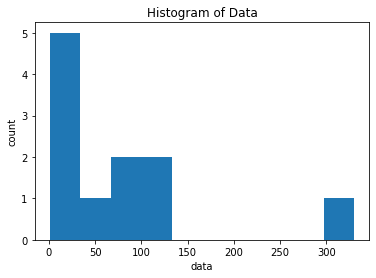

In [7]:
gaussian_o.plot_histogram()

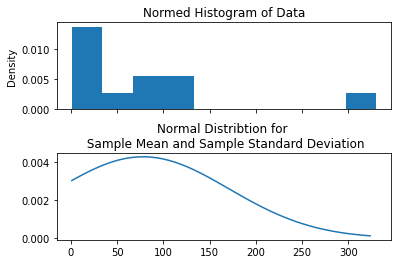

([1.0,
  7.58,
  14.16,
  20.740000000000002,
  27.32,
  33.9,
  40.480000000000004,
  47.06,
  53.64,
  60.22,
  66.8,
  73.38,
  79.96000000000001,
  86.54,
  93.12,
  99.7,
  106.28,
  112.86,
  119.44,
  126.02,
  132.6,
  139.18,
  145.76,
  152.34,
  158.92000000000002,
  165.5,
  172.08,
  178.66,
  185.24,
  191.82,
  198.4,
  204.98,
  211.56,
  218.14000000000001,
  224.72,
  231.3,
  237.88,
  244.46,
  251.04,
  257.62,
  264.2,
  270.78000000000003,
  277.36,
  283.94,
  290.52,
  297.1,
  303.68,
  310.26,
  316.84000000000003,
  323.42],
 [0.0030436941280150395,
  0.0032199635775976665,
  0.003389385629106679,
  0.0035498588092989685,
  0.0036993144412822716,
  0.0038357605437130374,
  0.003957325730527453,
  0.004062301768846044,
  0.004149183447609647,
  0.004216704458941581,
  0.004263868097796145,
  0.004289971740008139,
  0.004294624258609417,
  0.004277755775037969,
  0.0042396194054553134,
  0.004180784941175556,
  0.004102124683731816,
  0.004004791926750454,
  0

In [8]:
gaussian_o.plot_histogram_pdf()

Adding two Gaussian Distributions using Magic Methods </br>
gaus_a                      +             gaus_b              =
gaus_a + gaus_b 

In [9]:
gauss_one = Gaussian(5, 2)
gauss_two = Gaussian(10, 1)

gaussian_sum = gauss_one + gauss_two

print(gaussian_sum.mean)
print(gaussian_sum.stDev)

15
2.23606797749979


In [10]:
class Clothing:

    def __init__(self, color, size, style, price):
        self.color = color
        self.size = size
        self.style = style
        self.price = price
        
    def change_price(self, price):
        self.price = price
        
    def calculate_discount(self, discount):
        return self.price * (1 - discount)

    def calculate_shipping(self, weight, rate):
        return weight * rate
        
class Shirt(Clothing):
    
    def __init__(self, color, size, style, price, long_or_short):
        
        Clothing.__init__(self, color, size, style, price)
        self.long_or_short = long_or_short
    
    def double_price(self):
        self.price = 2*self.price
    
class Pants(Clothing):

    def __init__(self, color, size, style, price, waist):
        
        Clothing.__init__(self, color, size, style, price)
        self.waist = waist
        
    def calculate_discount(self, discount):
        return self.price * (1 - discount / 2)

class Blouse(Clothing):
    def __init__(self, color, size, style, price, country_of_origin):
        Clothing.__init__(self, color, size, style, price)
        self.country_of_origin = country_of_origin
    
    def triple_price(self):
        return 3 * self.price

In [11]:
class Distribution:
    
    def __init__(self, mu=0, sigma=1):
    
        """ Generic distribution class for calculating and 
        visualizing a probability distribution.
    
        Attributes:
            mean (float) representing the mean value of the distribution
            stdev (float) representing the standard deviation of the distribution
            data_list (list of floats) a list of floats extracted from the data file
            """
        
        self.mean = mu
        self.stdev = sigma
        self.data = []


    def read_data_file(self, file_name):
    
        """Function to read in data from a txt file. The txt file should have
        one number (float) per line. The numbers are stored in the data attribute.
                
        Args:
            file_name (string): name of a file to read from
        
        Returns:
            None
        
        """
            
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
    
        self.data = data_list

In [12]:
import math
import matplotlib.pyplot as plt

class Gaussian(Distribution):
    """ Gaussian distribution class for calculating and 
    visualizing a Gaussian distribution.
    
    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats extracted from the data file
            
    """
    def __init__(self, mu=0, sigma=1):
        
        Distribution.__init__(self, mu, sigma)
    
        
    
    def calculate_mean(self):
    
        """Function to calculate the mean of the data set.
        
        Args: 
            None
        
        Returns: 
            float: mean of the data set
    
        """
                    
        avg = 1.0 * sum(self.data) / len(self.data)
        
        self.mean = avg
        
        return self.mean



    def calculate_stdev(self, sample=True):

        """Function to calculate the standard deviation of the data set.
        
        Args: 
            sample (bool): whether the data represents a sample or population
        
        Returns: 
            float: standard deviation of the data set
    
        """

        if sample:
            n = len(self.data) - 1
        else:
            n = len(self.data)
    
        mean = self.calculate_mean()
    
        sigma = 0
    
        for d in self.data:
            sigma += (d - mean) ** 2
        
        sigma = math.sqrt(sigma / n)
    
        self.stdev = sigma
        
        return self.stdev
        
        
        
    def plot_histogram(self):
        """Function to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        
        Args:
            None
            
        Returns:
            None
        """
        plt.hist(self.data)
        plt.title('Histogram of Data')
        plt.xlabel('data')
        plt.ylabel('count')
        
        
        
    def pdf(self, x):
        """Probability density function calculator for the gaussian distribution.
        
        Args:
            x (float): point for calculating the probability density function
            
        
        Returns:
            float: probability density function output
        """
        
        return (1.0 / (self.stdev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x - self.mean) / self.stdev) ** 2)
        

    def plot_histogram_pdf(self, n_spaces = 50):

        """Function to plot the normalized histogram of the data and a plot of the 
        probability density function along the same range
        
        Args:
            n_spaces (int): number of data points 
        
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
            
        """
        
        mu = self.mean
        sigma = self.stdev

        min_range = min(self.data)
        max_range = max(self.data)
        
         # calculates the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces

        x = []
        y = []
        
        # calculate the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval*i
            x.append(tmp)
            y.append(self.pdf(tmp))

        # make the plots
        fig, axes = plt.subplots(2,sharex=True)
        fig.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density=True)
        axes[0].set_title('Normed Histogram of Data')
        axes[0].set_ylabel('Density')

        axes[1].plot(x, y)
        axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation')
        axes[0].set_ylabel('Density')
        plt.show()

        return x, y
        
    def __add__(self, other):
        
        """Function to add together two Gaussian distributions
        
        Args:
            other (Gaussian): Gaussian instance
            
        Returns:
            Gaussian: Gaussian distribution
            
        """
        
        result = Gaussian()
        result.mean = self.mean + other.mean
        result.stdev = math.sqrt(self.stdev ** 2 + other.stdev ** 2)
        
        return result
        
        
    def __repr__(self):
    
        """Function to output the characteristics of the Gaussian instance
        
        Args:
            None
        
        Returns:
            string: characteristics of the Gaussian
        
        """
        
        return "mean {}, standard deviation {}".format(self.mean, self.stdev)

In [13]:
gaussian_one = Gaussian(25, 3)
gaussian_two = Gaussian(30, 2)

In [16]:
gaussian_three = Gaussian()
gaussian_three.read_data_file('Numbers.txt')
gaussian_three.calculate_mean()


78.0909090909091

In [17]:
gaussian_three.calculate_stdev()

92.87459776004906

In [18]:
print(gaussian_one.mean)
print(gaussian_two.mean)

25
30


In [19]:
print(gaussian_one.stdev)
print(gaussian_two.stdev)

3
2


In [20]:
print(gaussian_three.mean)
print(gaussian_three.stdev)

78.0909090909091
92.87459776004906


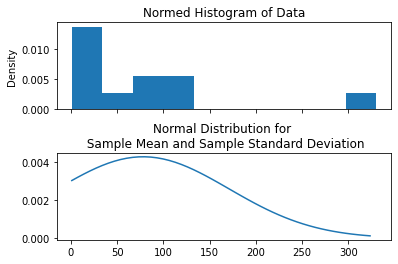

([1.0,
  7.58,
  14.16,
  20.740000000000002,
  27.32,
  33.9,
  40.480000000000004,
  47.06,
  53.64,
  60.22,
  66.8,
  73.38,
  79.96000000000001,
  86.54,
  93.12,
  99.7,
  106.28,
  112.86,
  119.44,
  126.02,
  132.6,
  139.18,
  145.76,
  152.34,
  158.92000000000002,
  165.5,
  172.08,
  178.66,
  185.24,
  191.82,
  198.4,
  204.98,
  211.56,
  218.14000000000001,
  224.72,
  231.3,
  237.88,
  244.46,
  251.04,
  257.62,
  264.2,
  270.78000000000003,
  277.36,
  283.94,
  290.52,
  297.1,
  303.68,
  310.26,
  316.84000000000003,
  323.42],
 [0.0030436941280150395,
  0.0032199635775976665,
  0.003389385629106679,
  0.0035498588092989685,
  0.0036993144412822716,
  0.0038357605437130374,
  0.003957325730527453,
  0.004062301768846044,
  0.004149183447609647,
  0.004216704458941581,
  0.004263868097796145,
  0.004289971740008139,
  0.004294624258609417,
  0.004277755775037969,
  0.0042396194054553134,
  0.004180784941175556,
  0.004102124683731816,
  0.004004791926750454,
  0

In [21]:
gaussian_three.plot_histogram_pdf()